Opencv, imgaug ve albumentations hepsi opencv veya numpy üzerinden işlem yapmaktadır.
GPU için Numba kullanılabilir fakat numba tüm fonksiyonları tanımıyor.
Ayrıca GPU üzerinde, Pytorch dışından farklı bir konuma yerleştirdiğinden
GPU hafızası gereksiz işgal edilmektedir.

Kornia kütüphanesi çok kullanılan görüntü işleme fonksiyonlarını
Pytorch ile tekrar oluşturmuştur.
Bu sayede Pytorch jit özelliğinden yararlanılabilmekte ve
tüm pipeline GPU ile hesaplanabilmektedir.

Augmentasyon işlemi Jit sırasında yapay sinir ağına eklenebildiğinden yazılımı verdiğiniz ortam için
ayrıca augmentasyon fonksiyonlarını yazmanıza gerek kalmamaktadır.

Kornia 08/09/2020 tarihi itibariyle 0.3.1 versiyondadır ve hâlâ geliştirme aşamasındadır.

In [3]:
import torch
import kornia

import cv2
import numpy as np

from matplotlib import pyplot as plt

H: height
W: width
C: channel
B: batch

Open cv'nin Numpy gösterimi. Opencv bgr(blue, green, red) şeklinde okur.

In [8]:
img_bgr = cv2.imread("../KendiResmim.jpg")  # HxWxC


Kornia 4D torch tensor

In [9]:
x_bgr = kornia.image_to_tensor(img_bgr)  # 1xCxHxW


bgr -> rgb renk dönüşümü

In [10]:
x_rgb = kornia.bgr_to_rgb(x_bgr)  # 1xCxHxW


Pytorch tensor -> Numpy image.

In [11]:
img_rgb = kornia.tensor_to_image(x_rgb)


Resmi görelim.

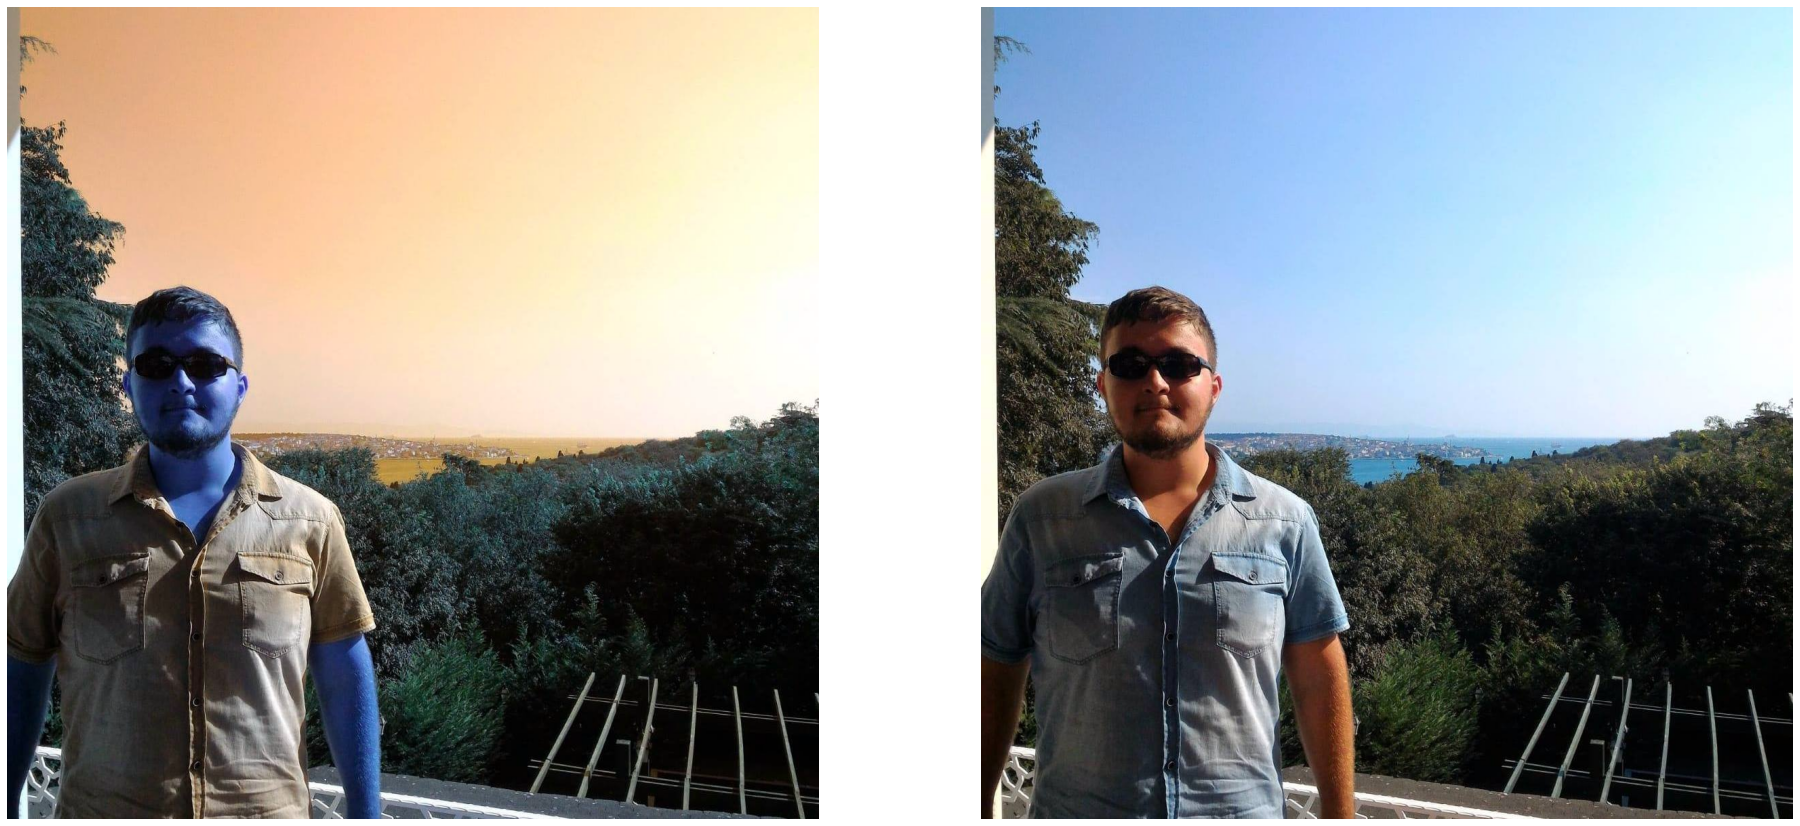

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(32, 16))
axs = axs.ravel()  # satırda görünsün.

# bgr(blue, green, red)
axs[0].axis('off')
axs[0].imshow(img_bgr)

# rgb(red, green, blue)
axs[1].axis('off')
axs[1].imshow(img_rgb)
